# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Electronic Signal Quality(ANN) Project

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Notebook setup

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
import h5py
import tensorflow

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras import metrics
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
# Notebook settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid")
np.set_printoptions(precision=3, suppress=True)

## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> PRAT I
  

  
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Description

* DOMAIN: Electronics and Telecommunication 
* CONTEXT: A   communications   equipment   manufacturing   company   has   a   product   which   is   responsible   for   emitting informative  signals.  Company  wants  to  build  a  machine  learning  model  which  can  help  the  company  to  predict  the equipment’s signal quality using various parameters. 
* DATA DESCRIPTION:The data set contains information on various signal tests performed
* Attribute Information: 
    - 1.Parameters: Various measurable signal parameters
    - 2.Signal_Quality: Final signal strength or quality
     
* PROJECT OBJECTIVE: The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number]. 
* Steps and tasks: [ Total Score: 10 points]
  - 1.Import data.
  - 2.Data analysis & visualisation
       - Perform relevant and detailed statistical analysis on the data
       - Perform relevant and detailed uni, bi and multi variate analysis.
  - 3.Design, train, tune and test a neural network regressor.
  - 4.Pickle the model for future use.

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 1.Import data

In [3]:
# Import the dataset named 'Part- 1,2&3 - Signal.csv'
data1  = pd.read_csv('./Part- 1,2&3 - Signal.csv') 

In [4]:
data1.head(10)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


#### Observation: 
<ol>
<li><span style="color:#228B22"> The data looks clean / garbage free in first 10 rows. 
<li><span style="color:#228B22"> However to ensure this, we will check the data type of each parameter

In [5]:
#Check the specificaions of each columns
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Observation:  
<ol>
<li><span style="color:#228B22"> The data has 1599 rows and 12 columns with 11 float and 1 integer data type 
<li><span style="color:#228B22"> There are no standard or non-standard missing values in the data

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 2.Data analysis & visualisation

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e">Perform relevant and detailed statistical analysis on the data 

In [6]:
# Five number summary of the data along with median and IQR
pd.set_option('display.max_columns', None)
median = data1.median().rename('median')
IQR = (data1.quantile(q=0.75)-data1.quantile(q=0.25)).rename('IQR')
pd.concat([data1.describe().T, median, IQR], axis=1)

,count,mean,std,min,25%,50%,75%,max,median,IQR
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000,7.90000,2.100000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000,0.52000,0.250000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000,0.26000,0.330000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000,2.20000,0.700000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100,0.07900,0.020000
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000,14.00000,14.000000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000,38.00000,40.000000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369,0.99675,0.002235
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000,3.31000,0.190000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000,0.62000,0.180000


#### Observation: 
<ol>
<li><span style="color:#228B22"> All values appears to be in resonable range
<li><span style="color:#228B22"> Few columns appear to be skewed

In [7]:
#  Checking the skewness and Kurtosis of data
pd.concat([data1.skew().rename('skeweness'), data1.kurtosis().rename('kurtosis')], axis=1)

,skeweness,kurtosis
Parameter 1,0.982751,1.132143
Parameter 2,0.671593,1.225542
Parameter 3,0.318337,-0.788998
Parameter 4,4.540655,28.617595
Parameter 5,5.680347,41.715787
Parameter 6,1.250567,2.023562
Parameter 7,1.515531,3.809824
Parameter 8,0.071288,0.934079
Parameter 9,0.193683,0.806943
Parameter 10,2.428672,11.720251


#### Observation: 
<ol>
<li><span style="color:#228B22"> The parameters 4 and 5 are heavily skewed.
<li><span style="color:#228B22"> The parameters 6,7 and 10 are moderately skewed.


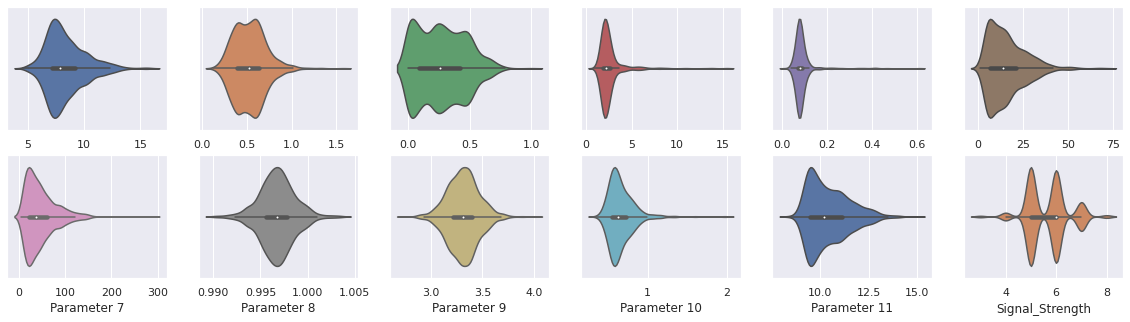

In [8]:
# Visualizing the skeweness more clearly with a vertical mirror image of distribution using the violin plot
fig, axs = plt.subplots(2,6, figsize=(20,5))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
for i in range(11):
    col='Parameter '+str(i+1)
    sns.violinplot(data1[col], color=next(colors)["color"], ax=axs[i], kde=False);
sns.violinplot(data1['Signal_Strength'], color=next(colors)["color"], ax=axs[11], kde=False);

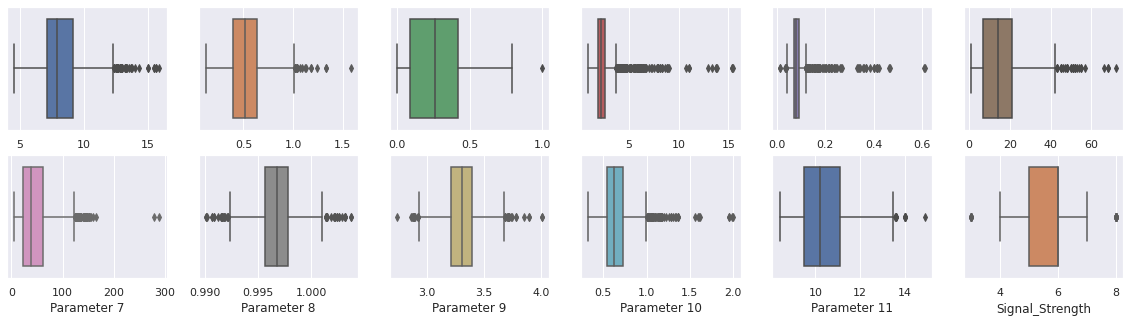

In [9]:
# Checking the presence of outliers
fig, axs = plt.subplots(2,6, figsize=(20,5))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
for i in range(11):
    col='Parameter '+str(i+1)
    sns.boxplot(data1[col], color=next(colors)["color"], ax=axs[i]);
sns.boxplot(data1['Signal_Strength'], color=next(colors)["color"], ax=axs[11]);

#### Observation: 
<ol>
<li><span style="color:#228B22"> All parameters have outliers based on box plot

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e">Perform relevant and detailed uni, bi and multi variate analysis

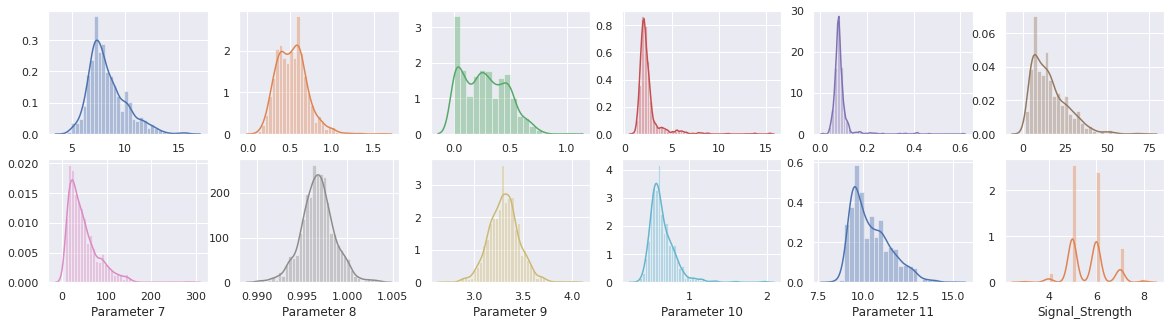

In [10]:
# Checking the univariate distribution of numerical columns
fig, axs = plt.subplots(2,6, figsize=(20,5))
colors = plt.rcParams["axes.prop_cycle"]()
axs=axs.flatten()
sns.set_color_codes()
for i in range(11):
    col='Parameter '+str(i+1)
    sns.distplot(data1[col], color=next(colors)["color"], ax=axs[i], kde=True);
sns.distplot(data1['Signal_Strength'], color=next(colors)["color"], ax=axs[11], kde=True);

#### Observation: 
<ol>
<li><span style="color:#228B22"> Parameters 4, 5, 6, 7 and 10 are skewed
<li><span style="color:#228B22"> Parameter 3 appears to be exhibiting gaussian mixing
<li><span style="color:#228B22"> The signal strength is also not a perfect normal distribution. It shows multiple modes in which 4 and 6 are the dominant modes

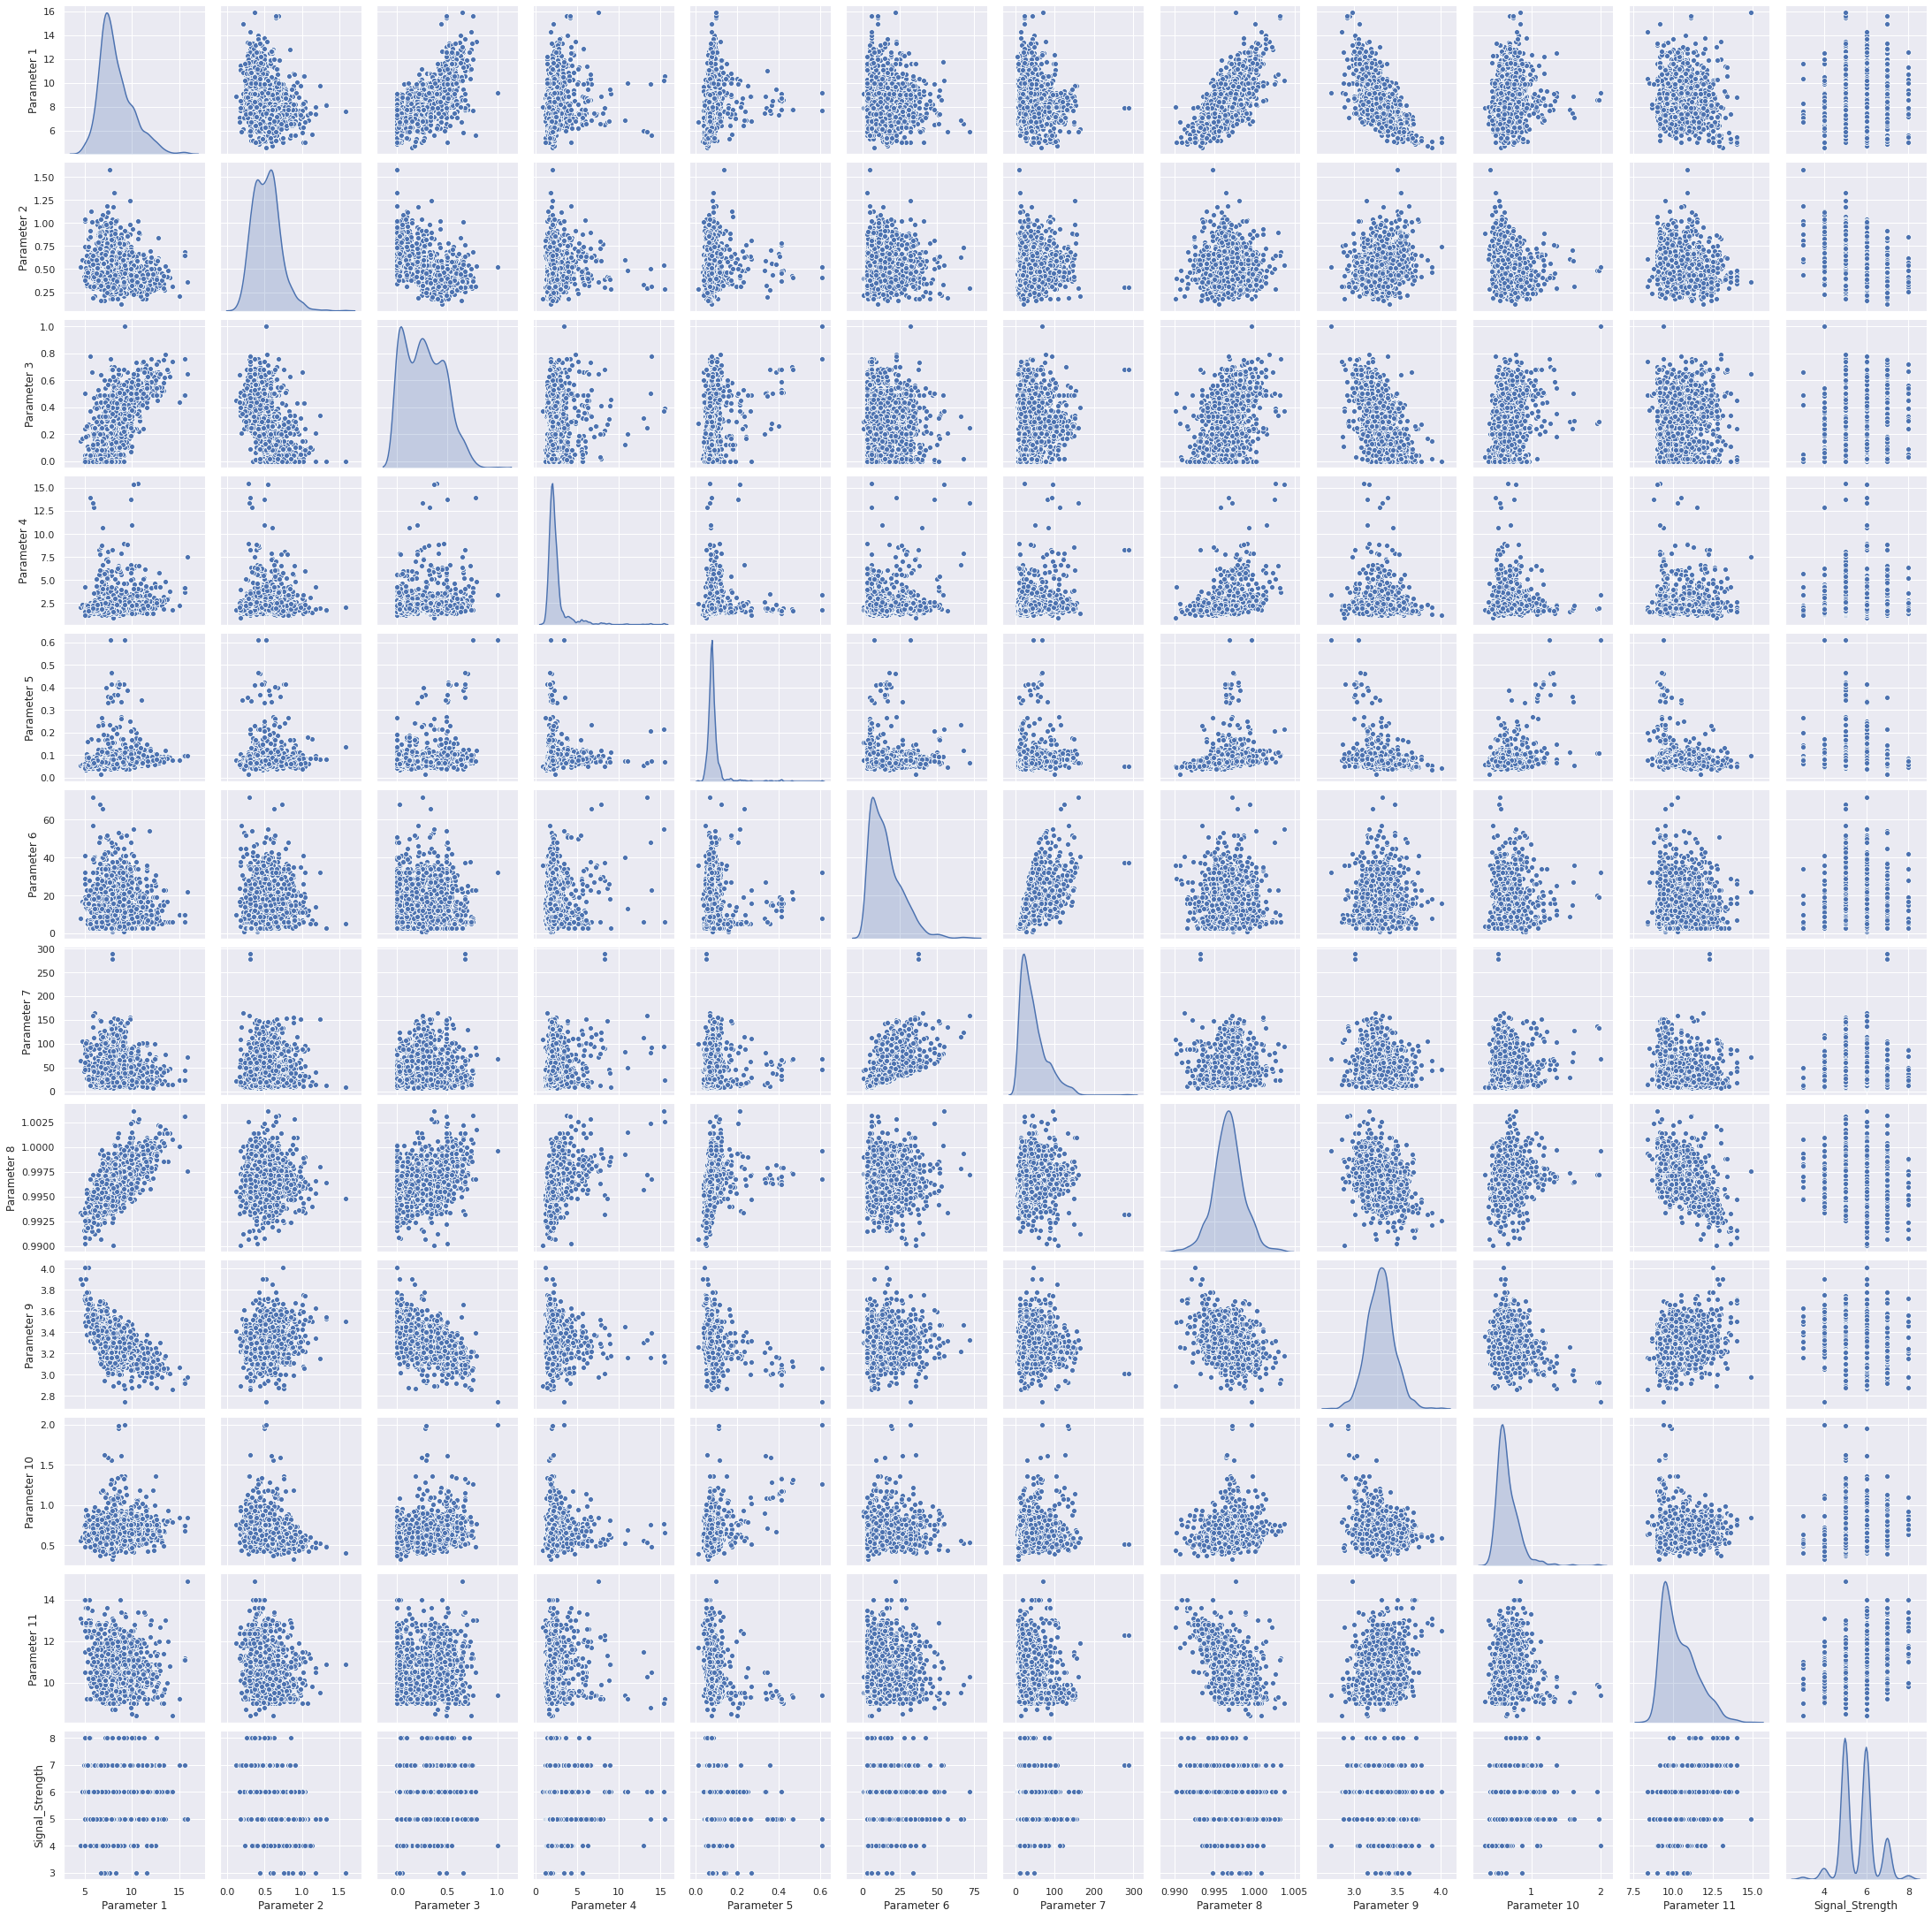

In [11]:
sns.pairplot(data1, diag_kind='kde');

#### Observation: 
<ol>
<li><span style="color:#228B22"> Parameter 3 indicates gaussian mixing in data
<li><span style="color:#228B22"> Parameter 1 and 3 appears to have a positive correlation
<li><span style="color:#228B22"> Parameter 1 and 8 appears to have a positive correlation
<li><span style="color:#228B22"> Parameters 1 and 9 appears to have a negative correlation
<li><span style="color:#228B22"> Some distributions appears to have heteroscedasticity

In [12]:
# Check the correlation between each attribute
data1.corr()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


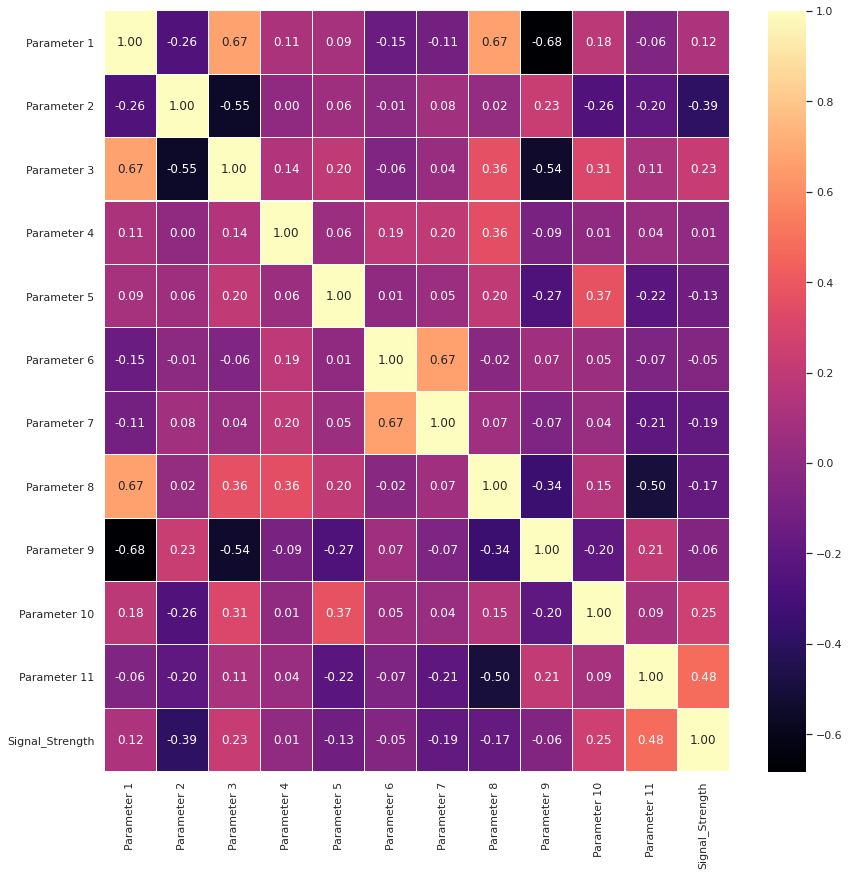

In [13]:
# Heat map for checking the correlation 
fig,ax = plt.subplots(figsize=(14, 14))   
sns.heatmap(data1.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

#### Observation: 
<ol>
<li><span style="color:#228B22"> The observations in scatter plots are confirmed. 
<li><span style="color:#228B22"> Apart from that parameters 6 and 7 are strongly correlated.
<li><span style="color:#228B22"> All parameters have weak correlation with signal strength

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 3.Design, train, tune and test a neural network regressor

In [14]:
# Converting the input data to numpy arrays

X = data1.drop('Signal_Strength', axis=1)
y = data1['Signal_Strength']
X = X.values
y = y.values

In [15]:
sc=StandardScaler()
X = sc.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [17]:
# Create a simple model with one fully connected layer

model = Sequential()
model.add(BatchNormalization(input_shape=(11,)))
model.add(Dense(1))

In [18]:
model.compile(optimizer='sgd', loss='mse', metrics = metrics.RootMeanSquaredError())

In [19]:
model.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=20)

# model.fit(X, y, epochs=500, validation_split=0.35, verbose=1)

Epoch 1/100
56/56 [==============================] - 1s 6ms/step - loss: 6.0056 - root_mean_squared_error: 2.4506 - val_loss: 1.0226 - val_root_mean_squared_error: 1.0112
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.9437 - root_mean_squared_error: 0.9714 - val_loss: 0.7423 - val_root_mean_squared_error: 0.8616
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.7513 - root_mean_squared_error: 0.8668 - val_loss: 0.6142 - val_root_mean_squared_error: 0.7837
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.6464 - root_mean_squared_error: 0.8040 - val_loss: 0.5490 - val_root_mean_squared_error: 0.7409
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.5896 - root_mean_squared_error: 0.7679 - val_loss: 0.5037 - val_root_mean_squared_error: 0.7097
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.5439 - root_mean_squared_error: 0.7375 - val_loss: 0.4730 - val_root_m

Epoch 49/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4530 - root_mean_squared_error: 0.6730 - val_loss: 0.3948 - val_root_mean_squared_error: 0.6283
Epoch 50/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4484 - root_mean_squared_error: 0.6696 - val_loss: 0.4043 - val_root_mean_squared_error: 0.6359
Epoch 51/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4525 - root_mean_squared_error: 0.6727 - val_loss: 0.3996 - val_root_mean_squared_error: 0.6321
Epoch 52/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4400 - root_mean_squared_error: 0.6633 - val_loss: 0.4052 - val_root_mean_squared_error: 0.6366
Epoch 53/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4557 - root_mean_squared_error: 0.6751 - val_loss: 0.3940 - val_root_mean_squared_error: 0.6277
Epoch 54/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4478 - root_mean_squared_error: 0.6691 - val_loss: 0.3931 - val_

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e">  Now creating a better model

In [20]:
# Now creating a more complex model

model = Sequential([
          Dense(activation = 'relu', 
            input_shape = (11,), 
            units=6, 
            kernel_initializer='uniform')
])

In [21]:
model.add(BatchNormalization())
model.add(Dense(6, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation = 'relu', kernel_initializer='uniform'))
print ("input shape: ", model.input_shape)
model.summary()

input shape:  (None, 11)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 6)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 145
Trainable params: 133
Non-trainable params: 12
_________________________________________________________________


In [22]:
model.compile(optimizer='sgd', 
              loss='mean_squared_error', 
              metrics= metrics.MeanSquaredError())

In [23]:
features=np.array(X)
labels=np.array(y)

In [24]:
model.fit(X, y, epochs=500, validation_split=0.35, verbose=1)

Epoch 1/500
33/33 [==============================] - 1s 13ms/step - loss: 17.7917 - mean_squared_error: 17.7917 - val_loss: 7.6149 - val_mean_squared_error: 7.6149
Epoch 2/500
33/33 [==============================] - 0s 4ms/step - loss: 2.4051 - mean_squared_error: 2.4051 - val_loss: 1.0697 - val_mean_squared_error: 1.0697
Epoch 3/500
33/33 [==============================] - 0s 3ms/step - loss: 0.7389 - mean_squared_error: 0.7389 - val_loss: 0.5501 - val_mean_squared_error: 0.5501
Epoch 4/500
33/33 [==============================] - 0s 3ms/step - loss: 0.5408 - mean_squared_error: 0.5408 - val_loss: 0.5647 - val_mean_squared_error: 0.5647
Epoch 5/500
33/33 [==============================] - 0s 4ms/step - loss: 0.4224 - mean_squared_error: 0.4224 - val_loss: 0.5259 - val_mean_squared_error: 0.5259
Epoch 6/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4231 - mean_squared_error: 0.4231 - val_loss: 0.5282 - val_mean_squared_error: 0.5282
Epoch 7/500
33/33 [============

33/33 [==============================] - 0s 3ms/step - loss: 0.4101 - mean_squared_error: 0.4101 - val_loss: 0.4821 - val_mean_squared_error: 0.4821
Epoch 102/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4064 - mean_squared_error: 0.4064 - val_loss: 0.4996 - val_mean_squared_error: 0.4996
Epoch 103/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4087 - mean_squared_error: 0.4087 - val_loss: 0.4772 - val_mean_squared_error: 0.4772
Epoch 104/500
33/33 [==============================] - 0s 3ms/step - loss: 0.3972 - mean_squared_error: 0.3972 - val_loss: 0.4742 - val_mean_squared_error: 0.4742
Epoch 105/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4012 - mean_squared_error: 0.4012 - val_loss: 0.4765 - val_mean_squared_error: 0.4765
Epoch 106/500
33/33 [==============================] - 0s 3ms/step - loss: 0.3977 - mean_squared_error: 0.3977 - val_loss: 0.4759 - val_mean_squared_error: 0.4759
Epoch 107/500
33/33 [===============

33/33 [==============================] - 0s 3ms/step - loss: 0.4056 - mean_squared_error: 0.4056 - val_loss: 0.4766 - val_mean_squared_error: 0.4766
Epoch 202/500
33/33 [==============================] - 0s 4ms/step - loss: 0.4108 - mean_squared_error: 0.4108 - val_loss: 0.4746 - val_mean_squared_error: 0.4746
Epoch 203/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4079 - mean_squared_error: 0.4079 - val_loss: 0.4541 - val_mean_squared_error: 0.4541
Epoch 204/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4064 - mean_squared_error: 0.4064 - val_loss: 0.4605 - val_mean_squared_error: 0.4605
Epoch 205/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4097 - mean_squared_error: 0.4097 - val_loss: 0.4542 - val_mean_squared_error: 0.4542
Epoch 206/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4175 - mean_squared_error: 0.4175 - val_loss: 0.4802 - val_mean_squared_error: 0.4802
Epoch 207/500
33/33 [===============

33/33 [==============================] - 0s 3ms/step - loss: 0.4065 - mean_squared_error: 0.4065 - val_loss: 0.4805 - val_mean_squared_error: 0.4805
Epoch 302/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4015 - mean_squared_error: 0.4015 - val_loss: 0.4837 - val_mean_squared_error: 0.4837
Epoch 303/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4008 - mean_squared_error: 0.4008 - val_loss: 0.4884 - val_mean_squared_error: 0.4884
Epoch 304/500
33/33 [==============================] - 0s 4ms/step - loss: 0.4141 - mean_squared_error: 0.4141 - val_loss: 0.4902 - val_mean_squared_error: 0.4902
Epoch 305/500
33/33 [==============================] - 0s 3ms/step - loss: 0.3971 - mean_squared_error: 0.3971 - val_loss: 0.4726 - val_mean_squared_error: 0.4726
Epoch 306/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4052 - mean_squared_error: 0.4052 - val_loss: 0.4721 - val_mean_squared_error: 0.4721
Epoch 307/500
33/33 [===============

33/33 [==============================] - 0s 3ms/step - loss: 0.4062 - mean_squared_error: 0.4062 - val_loss: 0.4670 - val_mean_squared_error: 0.4670
Epoch 402/500
33/33 [==============================] - 0s 3ms/step - loss: 0.3947 - mean_squared_error: 0.3947 - val_loss: 0.4658 - val_mean_squared_error: 0.4658
Epoch 403/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4088 - mean_squared_error: 0.4088 - val_loss: 0.4606 - val_mean_squared_error: 0.4606
Epoch 404/500
33/33 [==============================] - 0s 3ms/step - loss: 0.3953 - mean_squared_error: 0.3953 - val_loss: 0.4628 - val_mean_squared_error: 0.4628
Epoch 405/500
33/33 [==============================] - 0s 3ms/step - loss: 0.4000 - mean_squared_error: 0.4000 - val_loss: 0.4943 - val_mean_squared_error: 0.4943
Epoch 406/500
33/33 [==============================] - 0s 3ms/step - loss: 0.3971 - mean_squared_error: 0.3971 - val_loss: 0.4956 - val_mean_squared_error: 0.4956
Epoch 407/500
33/33 [===============

In [25]:
model.predict(np.array(X[0,:]).reshape(1,11))

array([[5.237]], dtype=float32)

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 4.Pickle the model for future use.

In [26]:
model.save('./dumped_regression_model')

INFO:tensorflow:Assets written to: ./dumped_regression_model/assets


## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> PRAT II
    
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Description

* DOMAIN: Electronics and Telecommunication 
* CONTEXT: A   communications   equipment   manufacturing   company   has   a   product   which   is   responsible   for   emitting informative signals. Company wants to build a deep learning model which can help the company to predict the equipment’s signal quality using various parameters. 
* DATA DESCRIPTION:The data set contains information on various signal tests performed
* Attribute Information: 
    - 1.Parameters: Various measurable signal parameters
    - 2.Signal_Quality: Final signal strength or quality
     
* PROJECT OBJECTIVE: The need is to build a classifier which can use these parameters to determine the signal strength or quality [as number].
* Steps and tasks: [ Total Score: 10 points]
  - 1.Import data.
  - 2.Data analysis & visualisation
       - Perform relevant and detailed statistical analysis on the data
       - Perform relevant and detailed uni, bi and multi variate analysis.
  - 3.Design, train, tune and test a neural network classifier.
  - 4.Pickle the model for future use.

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> Since steps 1 and 2 are a repetition of part I, they are omitted and we start with step 3 

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 3. Design, train, tune and test a neural network classifier

In [27]:
#Prepare the data

X = data1.drop('Signal_Strength', axis=1)
y = data1['Signal_Strength']
X = X.values
y = y.values

sc=StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
np.unique(y_train)

array([3, 4, 5, 6, 7, 8])

In [28]:
# One hot encoding of the output for classification 

print(y_train[10])
y_train = to_categorical(y_train, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)
print(y_train[10])

6
[0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [29]:
# Building a simple model for testing

model = Sequential()
model.add(Dense(11, input_shape = (11,), activation="relu"))
model.add(Dense(9, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 108       
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
model.fit(x=X_train, y=y_train, batch_size=20, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
56/56 [==============================] - 1s 5ms/step - loss: 2.4605 - accuracy: 0.0634 - val_loss: 2.1971 - val_accuracy: 0.1104
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 2.0512 - accuracy: 0.2127 - val_loss: 1.8854 - val_accuracy: 0.3083
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 1.7844 - accuracy: 0.3396 - val_loss: 1.6723 - val_accuracy: 0.3438
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 1.5994 - accuracy: 0.3780 - val_loss: 1.5169 - val_accuracy: 0.3854
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 1.4645 - accuracy: 0.4147 - val_loss: 1.4008 - val_accuracy: 0.4458
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 1.3633 - accuracy: 0.4620 - val_loss: 1.3127 - val_accuracy: 0.4708
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 1.2860 - accuracy: 0.5031 - val_loss: 1.2448 - val_accuracy: 0.5354
Epoch 8/100
5

Epoch 59/100
56/56 [==============================] - 0s 2ms/step - loss: 0.9389 - accuracy: 0.5952 - val_loss: 0.9494 - val_accuracy: 0.5750
Epoch 60/100
56/56 [==============================] - 0s 2ms/step - loss: 0.9377 - accuracy: 0.6005 - val_loss: 0.9488 - val_accuracy: 0.5708
Epoch 61/100
56/56 [==============================] - 0s 2ms/step - loss: 0.9368 - accuracy: 0.5970 - val_loss: 0.9483 - val_accuracy: 0.5708
Epoch 62/100
56/56 [==============================] - 0s 2ms/step - loss: 0.9359 - accuracy: 0.5952 - val_loss: 0.9483 - val_accuracy: 0.5792
Epoch 63/100
56/56 [==============================] - 0s 2ms/step - loss: 0.9351 - accuracy: 0.6032 - val_loss: 0.9483 - val_accuracy: 0.5667
Epoch 64/100
56/56 [==============================] - 0s 2ms/step - loss: 0.9343 - accuracy: 0.6041 - val_loss: 0.9470 - val_accuracy: 0.5750
Epoch 65/100
56/56 [==============================] - 0s 2ms/step - loss: 0.9334 - accuracy: 0.5961 - val_loss: 0.9466 - val_accuracy: 0.5750
Epoch 

In [31]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.9406 - accuracy: 0.5750


[0.9406402111053467, 0.574999988079071]

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Defining function for sanity checks and hyperparameter tuning

In [32]:
def train_and_test_loop(iterations, lr, Lambda, verb=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 6
    output_nodes = 9
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(11,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', 
                    kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=20, verbose=verb)
    score = model.evaluate(X_test, y_test, verbose=True)

In [33]:
#First we will check if the loss is reasonable by disabling regularization

lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda, verb=True)

15/15 [==============================] - 0s 1ms/step - loss: 2.1263 - accuracy: 0.2188


#### Observation:  
<ol>
<li><span style="color:#228B22"> The loss and accuracy vales looks resonable for untrained network

In [34]:
# Now crank up the regularization for sanity check 

lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda, verb=True)

15/15 [==============================] - 0s 1ms/step - loss: 8.2252 - accuracy: 0.0562


#### Observation:  
<ol>
<li><span style="color:#228B22"> The loss went up very high as expected. 

In [35]:
# Overfit to a small subset of dataset

X_train_subset = X_train[0:20]
y_train_subset = y_train[0:20]
X_train = X_train_subset
y_train = y_train_subset

In [36]:
# Setting a small learning rate and turning off the regularization

lr = 0.01
Lambda = 0
train_and_test_loop(500, lr, Lambda, verb=True)

Epoch 1/500
1/1 [==============================] - 0s 450ms/step - loss: 2.2440 - accuracy: 0.0500
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 2.2351 - accuracy: 0.1000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 2.2185 - accuracy: 0.1500
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 2.1952 - accuracy: 0.1500
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1657 - accuracy: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1315 - accuracy: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 2.0934 - accuracy: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 2.0524 - accuracy: 0.3000
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 2.0093 - accuracy: 0.3500
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 1.9644 - accuracy: 0.4000
Epoch 11/500
1/1 [=========

1/1 [==============================] - 0s 7ms/step - loss: 0.3602 - accuracy: 0.9500
Epoch 166/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.9500
Epoch 167/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3545 - accuracy: 0.9500
Epoch 168/500
1/1 [==============================] - 0s 8ms/step - loss: 0.3517 - accuracy: 0.9500
Epoch 169/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3489 - accuracy: 0.9500
Epoch 170/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.9500
Epoch 171/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3435 - accuracy: 0.9500
Epoch 172/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3404 - accuracy: 0.9500
Epoch 173/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3375 - accuracy: 0.9500
Epoch 174/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.9500
Epoch 175/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.0925 - accuracy: 0.9500
Epoch 329/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0920 - accuracy: 0.9500
Epoch 330/500
1/1 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.95 - 0s 4ms/step - loss: 0.0915 - accuracy: 0.9500
Epoch 331/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0910 - accuracy: 0.9500
Epoch 332/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9500
Epoch 333/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.9500
Epoch 334/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0895 - accuracy: 0.9500
Epoch 335/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0890 - accuracy: 0.9500
Epoch 336/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.9500
Epoch 337/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0881 -

1/1 [==============================] - 0s 4ms/step - loss: 0.0628 - accuracy: 1.0000
Epoch 411/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 412/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0623 - accuracy: 1.0000
Epoch 413/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 1.0000
Epoch 414/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0618 - accuracy: 1.0000
Epoch 415/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 1.0000
Epoch 416/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 1.0000
Epoch 417/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0611 - accuracy: 1.0000
Epoch 418/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0608 - accuracy: 1.0000
Epoch 419/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0606 - accuracy: 1.0000
Epoch 420/500
1/1 [=====

#### Observation:  
<ol>
<li><span style="color:#228B22"> We were able to successfully overfit. The traning accuraccy went to 100% and test accuracy is 50%. Therefore, the model architechture is good.

In [37]:
#Loading the original dataset

X = data1.drop('Signal_Strength', axis=1)
y = data1['Signal_Strength']
X = X.values
y = y.values

In [38]:
sc=StandardScaler()
X = sc.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [40]:
# One hot encoding of the output for classification 

print(y_train[10])
y_train = to_categorical(y_train, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)
print(y_train[10])

6
[0. 0. 0. 0. 0. 0. 1. 0. 0.]


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Start with small regularization and find learning rate that makes the loss go down.

- we start with Lambda(small regularization) = 1e-7
- we start with a small learning rate = 1e-7

In [41]:
#Now we will fine tune the hyperparameters

lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda, verb=True)

Epoch 1/20
56/56 [==============================] - 1s 2ms/step - loss: 2.1262 - accuracy: 0.2082
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 2.1262 - accuracy: 0.2091
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 2.1261 - accuracy: 0.2091
Epoch 4/20
56/56 [==============================] - 0s 1ms/step - loss: 2.1261 - accuracy: 0.2091
Epoch 5/20
56/56 [==============================] - 0s 1ms/step - loss: 2.1260 - accuracy: 0.2091
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 2.1260 - accuracy: 0.2091
Epoch 7/20
56/56 [==============================] - 0s 1ms/step - loss: 2.1259 - accuracy: 0.2091
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 2.1259 - accuracy: 0.2091
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 2.1258 - accuracy: 0.2091
Epoch 10/20
56/56 [==============================] - 0s 1ms/step - loss: 2.1258 - accuracy: 0.2091
Epoch 11/20
56/56 [

#### Observation:  
<ol>
<li><span style="color:#228B22"> Loss is barely changing and learning rate is too low

In [42]:
# Let's try high learning rate

lr = 10
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda, True)

Epoch 1/20
56/56 [==============================] - 1s 2ms/step - loss: 7.6074 - accuracy: 0.3119
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 6.9017 - accuracy: 0.3503
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 5.3683 - accuracy: 0.3637
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 10.0234 - accuracy: 0.3405
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 9.3947 - accuracy: 0.3664
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 7.4759 - accuracy: 0.3637
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 6.0519 - accuracy: 0.3494
Epoch 8/20
56/56 [==============================] - 0s 2ms/step - loss: 7.0913 - accuracy: 0.3557
Epoch 9/20
56/56 [==============================] - 0s 2ms/step - loss: 7.6753 - accuracy: 0.3423
Epoch 10/20
56/56 [==============================] - 0s 2ms/step - loss: 6.7526 - accuracy: 0.3557
Epoch 11/20
56/56 

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Run coarse search for 10 times with different lr and Lambda values each with 100 epochs.

In [43]:
def train_and_test_loop1(iterations, lr, Lambda, verb=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 6
    output_nodes = 9
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(11,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', 
                    kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=20, verbose=verb)
    score = model.evaluate(X_test, y_test, verbose=True)
    
    return score

In [44]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 1.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 9, best_acc, lr, Lambda))

15/15 [==============================] - 0s 1ms/step - loss: 1.4114 - accuracy: 0.4333
Try 1/9: Best_val_acc: [1.4113558530807495, 0.4333333373069763], lr: 2.5170195354148333, Lambda: 0.00014684335483827326

15/15 [==============================] - 0s 2ms/step - loss: 1.0089 - accuracy: 0.5542
Try 2/9: Best_val_acc: [1.0088962316513062, 0.5541666746139526], lr: 0.00023146984223206194, Lambda: 0.00016928067774602825

15/15 [==============================] - 0s 1ms/step - loss: 0.9936 - accuracy: 0.6021
Try 3/9: Best_val_acc: [0.9935530424118042, 0.6020833253860474], lr: 0.01350193921697214, Lambda: 0.0015242977629220853

15/15 [==============================] - 0s 1ms/step - loss: 1.8841 - accuracy: 0.4313
Try 4/9: Best_val_acc: [1.8840733766555786, 0.4312500059604645], lr: 1.6168516532809385e-05, Lambda: 0.00014923238203925606

15/15 [==============================] - 0s 1ms/step - loss: 0.9738 - accuracy: 0.5875
Try 5/9: Best_val_acc: [0.9738345742225647, 0.5874999761581421], lr: 0.01

#### Observation:  
<ol>
<li><span style="color:#228B22"> As you can see from above, Case 3 and 5 yields good accuracy. It is better to focus on those values for learning rate and Lambda

In [45]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-3.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-6,-3))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 4, best_acc, lr, Lambda))

15/15 [==============================] - 0s 1ms/step - loss: 0.9607 - accuracy: 0.5771
Try 1/4: Best_val_acc: [0.9607158899307251, 0.5770833492279053], lr: 0.009703462178451907, Lambda: 0.000921736028848484

15/15 [==============================] - 0s 1ms/step - loss: 1.0628 - accuracy: 0.5354
Try 2/4: Best_val_acc: [1.0627782344818115, 0.5354166626930237], lr: 0.09834238009425733, Lambda: 7.710900900998782e-05

15/15 [==============================] - 0s 1ms/step - loss: 0.9954 - accuracy: 0.5875
Try 3/4: Best_val_acc: [0.9953858852386475, 0.5874999761581421], lr: 0.058413699857432076, Lambda: 1.3073171276963955e-06

15/15 [==============================] - 0s 1ms/step - loss: 0.9754 - accuracy: 0.5813
Try 4/4: Best_val_acc: [0.9754378795623779, 0.581250011920929], lr: 0.024119488503625854, Lambda: 7.423356041485589e-06



#### Observation:  
<ol>
<li><span style="color:#228B22"> The highest accuracy obtained through fine tuning is 0.59

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Now we will try few other optimizers

In [46]:
# We will try few other optimizers
def train_and_test_loop2(iterations, Lambda, opt, verb=False):

    ## hyperparameters
    iterations = iterations
    hidden_nodes = 6
    output_nodes = 9
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(11,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', 
                    kernel_regularizer=regularizers.l2(Lambda)))

    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=20, verbose=verb)
    score = model.evaluate(X_test, y_test, verbose=True)
    
    return score

In [47]:
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-3.0, -1.0))
    
    opt = tensorflow.keras.optimizers.RMSprop(
        learning_rate=lr,
        rho=0.9,
        momentum=0.9,
        epsilon=1e-07,
        centered=False,
        name="RMSprop"
    )
    
    Lambda = math.pow(10, np.random.uniform(-6,-3))
    best_acc = train_and_test_loop2(100, Lambda, opt, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 4, best_acc, lr, Lambda))

15/15 [==============================] - 0s 1ms/step - loss: 1.0479 - accuracy: 0.5771
Try 1/4: Best_val_acc: [1.0479440689086914, 0.5770833492279053], lr: 0.0019039176389644941, Lambda: 5.6791543064425554e-05

15/15 [==============================] - 0s 1ms/step - loss: 1.0987 - accuracy: 0.5958
Try 2/4: Best_val_acc: [1.0987221002578735, 0.5958333611488342], lr: 0.005810871061330841, Lambda: 1.793347835645876e-06

15/15 [==============================] - 0s 1ms/step - loss: 1.2031 - accuracy: 0.5729
Try 3/4: Best_val_acc: [1.2031018733978271, 0.5729166865348816], lr: 0.0032082482450987693, Lambda: 4.683371279247167e-06

15/15 [==============================] - 0s 1ms/step - loss: 1.0441 - accuracy: 0.5813
Try 4/4: Best_val_acc: [1.0441149473190308, 0.581250011920929], lr: 0.0028578084436069145, Lambda: 0.0001294940934568163



In [48]:
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-3.0, -1.0))
    
    opt = tensorflow.keras.optimizers.Adam(
        learning_rate=lr,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
        amsgrad=False,
        name="Adam"
    )
    
    Lambda = math.pow(10, np.random.uniform(-6,-3))
    best_acc = train_and_test_loop2(100, Lambda, opt, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 4, best_acc, lr, Lambda))

15/15 [==============================] - 0s 2ms/step - loss: 1.0437 - accuracy: 0.6062
Try 1/4: Best_val_acc: [1.0437341928482056, 0.606249988079071], lr: 0.030265922568442277, Lambda: 0.00019305439797258933

15/15 [==============================] - 0s 1ms/step - loss: 0.9777 - accuracy: 0.5771
Try 2/4: Best_val_acc: [0.9777237772941589, 0.5770833492279053], lr: 0.0040942859420892265, Lambda: 3.5484901951524374e-05

15/15 [==============================] - 0s 1ms/step - loss: 1.0425 - accuracy: 0.6042
Try 3/4: Best_val_acc: [1.0424970388412476, 0.6041666865348816], lr: 0.01290116221418644, Lambda: 3.884519584753795e-05

15/15 [==============================] - 0s 1ms/step - loss: 1.0169 - accuracy: 0.5979
Try 4/4: Best_val_acc: [1.0168946981430054, 0.5979166626930237], lr: 0.010184120002451657, Lambda: 2.2263553246227138e-06



In [49]:
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-3.0, -1.0))
    
    opt = tensorflow.keras.optimizers.Adadelta(
    learning_rate=lr, rho=0.95, epsilon=1e-07, name="Adadelta"
)

    
    Lambda = math.pow(10, np.random.uniform(-6,-3))
    best_acc = train_and_test_loop2(100, Lambda, opt, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 4, best_acc, lr, Lambda))

15/15 [==============================] - 0s 1ms/step - loss: 1.5518 - accuracy: 0.4667
Try 1/4: Best_val_acc: [1.551816701889038, 0.46666666865348816], lr: 0.011985466309650503, Lambda: 0.0002984289924229134

15/15 [==============================] - 0s 1ms/step - loss: 2.0463 - accuracy: 0.3125
Try 2/4: Best_val_acc: [2.0463082790374756, 0.3125], lr: 0.007193048694337996, Lambda: 7.361123649451174e-06

15/15 [==============================] - 0s 1ms/step - loss: 1.7397 - accuracy: 0.4479
Try 3/4: Best_val_acc: [1.739732027053833, 0.4479166567325592], lr: 0.011593862209070674, Lambda: 4.408391124820056e-05

15/15 [==============================] - 0s 1ms/step - loss: 2.0411 - accuracy: 0.2458
Try 4/4: Best_val_acc: [2.0410916805267334, 0.24583333730697632], lr: 0.0048482668513823626, Lambda: 0.0001939688993100456



In [50]:
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-3.0, -1.0))
    
    opt = tensorflow.keras.optimizers.Adagrad(
    learning_rate=lr,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad"
)

    
    Lambda = math.pow(10, np.random.uniform(-6,-3))
    best_acc = train_and_test_loop2(100, Lambda, opt, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 4, best_acc, lr, Lambda))

15/15 [==============================] - 0s 1ms/step - loss: 0.9469 - accuracy: 0.5958
Try 1/4: Best_val_acc: [0.9469308853149414, 0.5958333611488342], lr: 0.040141069660874384, Lambda: 3.3924274100285247e-06

15/15 [==============================] - 0s 1ms/step - loss: 0.9845 - accuracy: 0.6062
Try 2/4: Best_val_acc: [0.9844706058502197, 0.606249988079071], lr: 0.007998508682089178, Lambda: 0.0001268782726257055

15/15 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.5938
Try 3/4: Best_val_acc: [0.9999838471412659, 0.59375], lr: 0.010744338476012253, Lambda: 0.00010546564674456439

15/15 [==============================] - 0s 1ms/step - loss: 1.3363 - accuracy: 0.4646
Try 4/4: Best_val_acc: [1.3362559080123901, 0.4645833373069763], lr: 0.0024983166200363734, Lambda: 4.974766909543232e-05



In [51]:
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-3.0, -1.0))
    
    opt = tensorflow.keras.optimizers.Nadam(
    learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)

    
    Lambda = math.pow(10, np.random.uniform(-6,-3))
    best_acc = train_and_test_loop2(100, Lambda, opt, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 4, best_acc, lr, Lambda))

15/15 [==============================] - 0s 2ms/step - loss: 1.1337 - accuracy: 0.5958
Try 1/4: Best_val_acc: [1.1337374448776245, 0.5958333611488342], lr: 0.01357255003732071, Lambda: 2.216521774558216e-05

15/15 [==============================] - 0s 1ms/step - loss: 0.9484 - accuracy: 0.6000
Try 2/4: Best_val_acc: [0.9483770728111267, 0.6000000238418579], lr: 0.0013827634491448606, Lambda: 6.447831206346766e-06

15/15 [==============================] - 0s 1ms/step - loss: 1.1315 - accuracy: 0.5437
Try 3/4: Best_val_acc: [1.1315010786056519, 0.543749988079071], lr: 0.018321029844086588, Lambda: 3.6994691372630114e-06

15/15 [==============================] - 0s 1ms/step - loss: 0.9273 - accuracy: 0.6104
Try 4/4: Best_val_acc: [0.927336573600769, 0.6104166507720947], lr: 0.003193603435497024, Lambda: 4.055739854190772e-05



In [52]:
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-3.0, -1.0))
    
    opt = tensorflow.keras.optimizers.Ftrl(
    learning_rate=lr,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.0,
    beta=0.0
)

    
    Lambda = math.pow(10, np.random.uniform(-6,-3))
    best_acc = train_and_test_loop2(100, Lambda, opt, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 4, best_acc, lr, Lambda))

15/15 [==============================] - 0s 1ms/step - loss: 0.9810 - accuracy: 0.6229
Try 1/4: Best_val_acc: [0.9809768199920654, 0.6229166388511658], lr: 0.012166216581953103, Lambda: 1.0448195922765476e-06

15/15 [==============================] - 0s 1ms/step - loss: 1.9306 - accuracy: 0.4354
Try 2/4: Best_val_acc: [1.9306433200836182, 0.43541666865348816], lr: 0.001164815282398427, Lambda: 0.0006898786168839292

15/15 [==============================] - 0s 1ms/step - loss: 0.9151 - accuracy: 0.6021
Try 3/4: Best_val_acc: [0.915093183517456, 0.6020833253860474], lr: 0.03376269739464985, Lambda: 9.94803382012872e-06

15/15 [==============================] - 0s 3ms/step - loss: 0.9774 - accuracy: 0.6125
Try 4/4: Best_val_acc: [0.9773865938186646, 0.612500011920929], lr: 0.012352865379121527, Lambda: 1.0505124054451018e-06



#### Observation:  
<ol>
<li><span style="color:#228B22"> The SGD optmizer gave the best results
<li><span style="color:#228B22"> Highest accuracy we obtained is 0.63

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 4.Pickle the model for future use.

In [53]:
model.save('./dumped_classification_model')

INFO:tensorflow:Assets written to: ./dumped_classification_model/assets


## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> PRAT III
    
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Description

* CONTEXT: Develop  a  clickable  GUI  [desk  application  or  web  service  application]  which  can  automate  Part  I  &  II  of  this project. 

![sample-gui](./sample-gui.png)

In [54]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import re


In [55]:
win = tk.Tk()
win.configure(background="#F3F3F3")
win.geometry("670x250") 
win.title('Neural Networks GUI - Great Learning')

#First Row

Name_label = ttk.Label(win, text="Step1: File Name:")
Name_label.grid(row=0,column=0,sticky=tk.W) # tk.W --> West Alignment

Name_var = tk.StringVar()
Name_entrybox = ttk.Entry(win, width=16, textvariable=Name_var)
Name_entrybox.grid(row=0, column=1)

def Import_Data():
    global DB
    DF_Name = Name_var.get()
    DB_extension=re.findall("\..*", DF_Name)
    if DB_extension==['.xlxs']:
        DB=pd.read_excel(DF_Name)
    elif DB_extension==['.csv']:
        DB=pd.read_csv(DF_Name)
    #Blank empty window to print conformation
    confirm="Done"
    Confirm_entrybox=ttk.Entry(win, width=16)
    Confirm_entrybox.grid(row=0, column=3)
    Confirm_entrybox.insert(1, str(confirm))

Import_data_Button = ttk.Button(win, text="Import Data", command=Import_Data)
Import_data_Button.grid(row=0,column=2)


#Second Row

Target_Column_label = ttk.Label(win, text="Step2: Target Column:")
Target_Column_label.grid(row=1,column=0,sticky=tk.W) # tk.W --> West Alignment

Target_Column_var = tk.StringVar()
Target_Column_entrybox = ttk.Entry(win, width=16, textvariable=Target_Column_var)
Target_Column_entrybox.grid(row=1, column=1)

def Read_Target():
    
    global label
    label = Target_Column_var.get()
    
    #Blank empty window to print conformation
    confirm="Found"
    Confirm_entrybox=ttk.Entry(win, width=16)
    Confirm_entrybox.grid(row=1, column=3)
    Confirm_entrybox.insert(1, str(confirm))

Read_target_Button = ttk.Button(win, text="Import Target", command=Read_Target)
Read_target_Button.grid(row=1,column=2)

#Third Row

Regressor_title_label = ttk.Label(win, text="Step3: Neural Network Regressor")
Regressor_title_label.grid(row=2,column=0,sticky=tk.W)

#Fourth Row

Regressor_train_label = ttk.Label(win, text="Regression")
Regressor_train_label.grid(row=3,column=0,sticky=tk.E)

def Train():
    
    global regressor_model
    
    X = DB.drop(label, axis=1)
    y = DB[label]
    X = X.values
    y = y.values
    
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

    model = Sequential([
          Dense(activation = 'relu', 
            input_shape = (11,), 
            units=6, 
            kernel_initializer='uniform')
    ])
    model.add(BatchNormalization())
    model.add(Dense(6, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation = 'relu', kernel_initializer='uniform'))
    
    model.compile(optimizer='sgd', 
              loss='mean_squared_error', 
              metrics= metrics.MeanSquaredError())
    
    model.fit(X, y, epochs=100, validation_split=0.35, verbose=1)
    
    regressor_model = model

    #Blank empty window to print conformation
    confirm="Network Trained"
    Confirm_entrybox=ttk.Entry(win, width=16)
    Confirm_entrybox.grid(row=3, column=2)
    Confirm_entrybox.insert(1, str(confirm))

Train_Button = ttk.Button(win, text="Train", command=Train)
Train_Button.grid(row=3,column=1)

#Fifth Row

Regressor_pickle_label = ttk.Label(win, text="Pickle")
Regressor_pickle_label.grid(row=4,column=0,sticky=tk.E)

def Pickle():
    
    regressor_model.save('./NN_Regressor')
    
    #Blank empty window to print conformation
    confirm="Saved model to disk"
    Confirm_entrybox=ttk.Entry(win, width=16)
    Confirm_entrybox.grid(row=4, column=2)
    Confirm_entrybox.insert(1, str(confirm))

Pickle_Button = ttk.Button(win, text="Run", command=Pickle)
Pickle_Button.grid(row=4,column=1)

#Sixth Row

Classifier_title_label = ttk.Label(win, text="Step3: Neural Network Classifier")
Classifier_title_label.grid(row=5,column=0,sticky=tk.W)

#Seventh Row

Classifier_train_label = ttk.Label(win, text="Classifier")
Classifier_train_label.grid(row=6,column=0,sticky=tk.E)

def cl_Train():
    
    global classifier_model
    
    X = DB.drop(label, axis=1)
    y = DB[label]
    X = X.values
    y = y.values
    
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    y_train = to_categorical(y_train, num_classes=9)
    y_test = to_categorical(y_test, num_classes=9)
    model = Sequential([
          Dense(activation = 'relu', 
            input_shape = (11,), 
            units=6, 
            kernel_initializer='uniform')
    ])
    
    model = Sequential()
    model.add(Dense(11, input_shape = (11,), activation="relu"))
    model.add(Dense(9, activation="softmax"))
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
    model.fit(x=X_train, y=y_train, batch_size=20, epochs=100, validation_data=(X_test, y_test))
    
    classifier_model = model
    
    #Blank empty window to print conformation
    confirm="Network Trained"
    Confirm_entrybox=ttk.Entry(win, width=16)
    Confirm_entrybox.grid(row=6, column=2)
    Confirm_entrybox.insert(1, str(confirm))

cl_Train_Button = ttk.Button(win, text="Train", command=cl_Train)
cl_Train_Button.grid(row=6,column=1)

#Eighth Row

Classifier_pickle_label = ttk.Label(win, text="Pickle")
Classifier_pickle_label.grid(row=7,column=0,sticky=tk.E)

def cl_Pickle():
    
    classifier_model.save('./NN_classifier')
    
    #Blank empty window to print conformation
    confirm="Saved model to disk"
    Confirm_entrybox=ttk.Entry(win, width=16)
    Confirm_entrybox.grid(row=7, column=2)
    Confirm_entrybox.insert(1, str(confirm))

cl_Pickle_Button = ttk.Button(win, text="Run", command=cl_Pickle)
cl_Pickle_Button.grid(row=7,column=1)

win.mainloop()

## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> PRAT IV
    
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Description

* DOMAIN:  Autonomous Vehicles 
* BUSINESS CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important   component   of   modern-day   map   making.   A   classic   example   of   a   corpus   of   such   street-level photographs  is  Google’s  Street  View  imagery  composed  of  hundreds  of  millions  of  geo-located  360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the  building  it  represents.  More  broadly,  recognising  numbers  in  photographs  is  a  problem  of  interest  to  the optical character recognition community. While  OCR  on  constrained  domains  like  document  processing  is  well  studied,  arbitrary  multi-character  text recognition  in  photographs  is  still  highly  challenging.  This  difficulty  arises  due  to  the  wide  variability  in  the visual  appearance  of  text  in  the  wild  on  account  of  a  large  range  of  fonts,  colours,  styles,  orientations,  and character arrangements. The   recognition   problem   is   further   complicated   by   environmental   factors   such   as   lighting,   shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In  this  project,  we  will  use  the  dataset  with  images  centred  around  a  single  digit  (many  of  the  images  do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

* DATA DESCRIPTION: The  SVHN  is  a  real-world  image  dataset  for  developing  machine  learning  and  object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
![sample-image](sample-image.png)
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The  dataset  has  been  provided  in  the  form  of  h5py files.  You  can  read  about  this file  format  here: http://docs.h5py.org/en/stable/high/dataset.html

* PROJECT OBJECTIVE: We will build a digit classifier on the SVHN (Street View Housing Number) dataset.
* Steps and tasks: [ Total Score: 10 points]
  - 1.Import data.
  - 2.Data pre-processing and visualisation
  - 3.Design, train, tune and test a neural network image classifier. 
  - 4.Plot  the  training  loss,  validation  loss  vs  number  of  epochs  and  training  accuracy,  validation  accuracy  vs  number  of epochs plot and write your observations on the same

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 1.Import data.

In [56]:
# Import the dataset named 'Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5'
f = h5py.File('./Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [57]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [58]:
X_train = f['X_train'][...]
X_test = f['X_test'][...]
X_val = f['X_val'][...]
y_train = f['y_train'][...]
y_test = f['y_test'][...]
y_val = f['y_val'][...]
f.close()

In [59]:
print ("X_train shape: {} \nX_test shape: {} \nX_val shape: {}\
       \ny_train shape: {} \ny_test shape: {} \ny_val shape: {}"\
       .format(X_train.shape, X_test.shape, X_val.shape,\
              y_train.shape, y_test.shape, y_val.shape))

X_train shape: (42000, 32, 32) 
X_test shape: (18000, 32, 32) 
X_val shape: (60000, 32, 32)       
y_train shape: (42000,) 
y_test shape: (18000,) 
y_val shape: (60000,)


In [60]:
print ("X_train type: {} \nX_test type: {} \nX_val type: {}\
       \ny_train type: {} \ny_test type: {} \ny_val type: {}"\
       .format(X_train.dtype, X_test.dtype, X_val.dtype,\
              y_train.dtype, y_test.dtype, y_val.dtype))

X_train type: float32 
X_test type: float32 
X_val type: float32       
y_train type: uint8 
y_test type: uint8 
y_val type: uint8


### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 2.Data pre-processing and visualisation

2


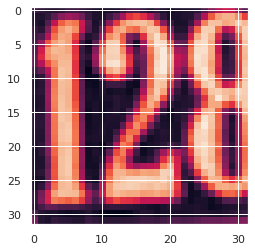

In [61]:
plt.imshow(X_train[0]);
print (y_train[0])

In [62]:
# X_train = X_train.reshape((X_train.shape[0], -1))
# X_test = X_test.reshape((X_test.shape[0], -1))
# X_val = X_val.reshape((X_val.shape[0], -1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


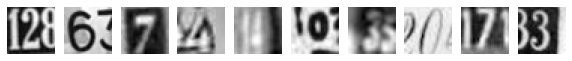

In [63]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

In [64]:
#Normalizing the data

print(X_train.max())
print(X_train.min())
print(X_test.max())
print(X_test.min())
print(X_val.max())
print(X_val.min())

X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

print(X_train.max())
print(X_train.min())
print(X_test.max())
print(X_test.min())
print(X_val.max())
print(X_val.min())

254.9745
0.0
254.9745
0.0
254.9745
0.0
0.9999
0.0
0.9999
0.0
0.9999
0.0


### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 3.Design, train, tune and test a neural network image classifier

In [65]:
#Design a simple model with sigmoid and softmax

model = Sequential()
model.add(Dense(input_shape = (32, 32), units=(32)))
model.add(Flatten())
model.add(Activation('sigmoid'))
model.add(Dense(1024))
model.add(Activation('sigmoid'))
model.add(Dense(250))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [66]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [67]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 0, validation_data=(X_test, y_test))

In [68]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 3s 5ms/step - loss: 2.3027 - accuracy: 0.1002


In [69]:
print('Test accuracy: ', results[1])

Test accuracy:  0.10022222250699997


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Defining function for sanity checks and hyperparameter tuning

In [70]:
def train_and_test_loop(iterations, lr, Lambda, verb=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes_1 = 1024
    hidden_nodes_2 = 250
    hidden_nodes_3 = 50
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(input_shape = (32, 32), units=(32)))
    model.add(Flatten())
    model.add(Activation('sigmoid'))
    model.add(Dense(hidden_nodes_1))
    model.add(Activation('sigmoid'))
    model.add(Dense(hidden_nodes_2))
    model.add(Activation('sigmoid'))
    model.add(Dense(hidden_nodes_3))
    model.add(Activation('sigmoid'))
    model.add(Dense(output_nodes, activation='softmax', 
                    kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=20, verbose=verb)
    score = model.evaluate(X_test, y_test, verbose=True)

In [71]:
#First we will check if the loss is reasonable by disabling regularization

lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda, verb=False)

563/563 [==============================] - 3s 4ms/step - loss: 2.3851 - accuracy: 0.0982


#### Observation:  
<ol>
<li><span style="color:#228B22"> The loss and accuracy vales looks resonable for untrained network

In [72]:
# Now crank up the regularization for sanity check 

lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda, verb=True)

563/563 [==============================] - 3s 5ms/step - loss: 2.3026 - accuracy: 0.0955


#### Observation:  
<ol>
<li><span style="color:#228B22"> The loss went up very high as expected. 

In [73]:
# Overfit to a small subset of dataset

X_train_subset = X_train[0:20]
y_train_subset = y_train[0:20]
# X_train = X_train_subset
# y_train = y_train_subset

In [74]:
def overfitting_train_and_test_loop_1(iterations, lr, Lambda, verb=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes_1 = 1024
    hidden_nodes_2 = 250
    hidden_nodes_3 = 50
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(input_shape = (32, 32), units=(32)))
    model.add(Flatten())
    model.add(Activation('sigmoid'))
    model.add(Dense(hidden_nodes_1))
    model.add(Activation('sigmoid'))
    model.add(Dense(hidden_nodes_2))
    model.add(Activation('sigmoid'))
    model.add(Dense(hidden_nodes_3))
    model.add(Activation('sigmoid'))
    model.add(Dense(output_nodes, activation='softmax', 
                    kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train_subset, y_train_subset, epochs=iterations, batch_size=1, verbose=verb)
    score = model.evaluate(X_test, y_test, verbose=True)

In [75]:
# Setting a small learning rate and turning off the regularization

lr = 0.01
Lambda = 0
overfitting_train_and_test_loop_1(500, lr, Lambda, verb=True)

Epoch 1/500
20/20 [==============================] - 1s 7ms/step - loss: 2.4865 - accuracy: 0.0500
Epoch 2/500
20/20 [==============================] - 0s 7ms/step - loss: 2.2549 - accuracy: 0.2500
Epoch 3/500
20/20 [==============================] - 0s 8ms/step - loss: 2.3391 - accuracy: 0.1000
Epoch 4/500
20/20 [==============================] - 0s 7ms/step - loss: 2.1678 - accuracy: 0.2000
Epoch 5/500
20/20 [==============================] - 0s 8ms/step - loss: 2.1419 - accuracy: 0.0500
Epoch 6/500
20/20 [==============================] - 0s 7ms/step - loss: 2.0340 - accuracy: 0.2500
Epoch 7/500
20/20 [==============================] - 0s 7ms/step - loss: 2.0463 - accuracy: 0.2500
Epoch 8/500
20/20 [==============================] - 0s 8ms/step - loss: 2.0476 - accuracy: 0.1500
Epoch 9/500
20/20 [==============================] - 0s 7ms/step - loss: 2.0147 - accuracy: 0.1500
Epoch 10/500
20/20 [==============================] - 0s 7ms/step - loss: 2.0579 - accuracy: 0.2500
Epoch 11/

20/20 [==============================] - 0s 7ms/step - loss: 1.9629 - accuracy: 0.2500
Epoch 84/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9473 - accuracy: 0.2500
Epoch 85/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9842 - accuracy: 0.1500
Epoch 86/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9491 - accuracy: 0.2500
Epoch 87/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9478 - accuracy: 0.2500
Epoch 88/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9469 - accuracy: 0.2500
Epoch 89/500
20/20 [==============================] - 0s 8ms/step - loss: 1.9445 - accuracy: 0.2500
Epoch 90/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9529 - accuracy: 0.2500
Epoch 91/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9492 - accuracy: 0.2500
Epoch 92/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9570 - accuracy: 0.2500
Epoch 93/500


20/20 [==============================] - 0s 7ms/step - loss: 1.9650 - accuracy: 0.2500
Epoch 165/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9454 - accuracy: 0.2500
Epoch 166/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9461 - accuracy: 0.2500
Epoch 167/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9384 - accuracy: 0.2500
Epoch 168/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9457 - accuracy: 0.2500
Epoch 169/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9534 - accuracy: 0.1500
Epoch 170/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9472 - accuracy: 0.2500
Epoch 171/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9536 - accuracy: 0.2500
Epoch 172/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9548 - accuracy: 0.2500
Epoch 173/500
20/20 [==============================] - 0s 7ms/step - loss: 1.9421 - accuracy: 0.2500
Epoc

20/20 [==============================] - 0s 7ms/step - loss: 1.4045 - accuracy: 0.4000
Epoch 327/500
20/20 [==============================] - 0s 7ms/step - loss: 1.4044 - accuracy: 0.2500
Epoch 328/500
20/20 [==============================] - 0s 7ms/step - loss: 1.4024 - accuracy: 0.3000
Epoch 329/500
20/20 [==============================] - 0s 7ms/step - loss: 1.4256 - accuracy: 0.3000
Epoch 330/500
20/20 [==============================] - 0s 7ms/step - loss: 1.4048 - accuracy: 0.2500
Epoch 331/500
20/20 [==============================] - 0s 7ms/step - loss: 1.3866 - accuracy: 0.4000
Epoch 332/500
20/20 [==============================] - 0s 7ms/step - loss: 1.3512 - accuracy: 0.4000
Epoch 333/500
20/20 [==============================] - 0s 7ms/step - loss: 1.4106 - accuracy: 0.3500
Epoch 334/500
20/20 [==============================] - 0s 7ms/step - loss: 1.3807 - accuracy: 0.2500
Epoch 335/500
20/20 [==============================] - 0s 7ms/step - loss: 1.4969 - accuracy: 0.2000
Epoc

20/20 [==============================] - 0s 7ms/step - loss: 0.7273 - accuracy: 0.6500
Epoch 489/500
20/20 [==============================] - 0s 7ms/step - loss: 0.8889 - accuracy: 0.4500
Epoch 490/500
20/20 [==============================] - 0s 7ms/step - loss: 1.0825 - accuracy: 0.3500
Epoch 491/500
20/20 [==============================] - 0s 7ms/step - loss: 1.8403 - accuracy: 0.4000
Epoch 492/500
20/20 [==============================] - 0s 7ms/step - loss: 1.8098 - accuracy: 0.2000
Epoch 493/500
20/20 [==============================] - 0s 7ms/step - loss: 1.2875 - accuracy: 0.4500
Epoch 494/500
20/20 [==============================] - 0s 7ms/step - loss: 1.1239 - accuracy: 0.6000
Epoch 495/500
20/20 [==============================] - 0s 7ms/step - loss: 1.0136 - accuracy: 0.6000
Epoch 496/500
20/20 [==============================] - 0s 7ms/step - loss: 1.0171 - accuracy: 0.6000
Epoch 497/500
20/20 [==============================] - 0s 7ms/step - loss: 0.9768 - accuracy: 0.5000
Epoc

#### Observation:  
<ol>
<li><span style="color:#228B22"> Overfitting doesn't come up to expectations, lets keep updating the architechture of the model

In [76]:
#Model with 'he_normal' kernel initializaiton
def overfitting_train_and_test_loop_2(iterations, lr, Lambda, verb=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes_1 = 1024
    hidden_nodes_2 = 250
    hidden_nodes_3 = 50
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(input_shape = (32, 32), units=(32), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Flatten())
    model.add(Activation('sigmoid'))    
    model.add(Dense(hidden_nodes_1, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(hidden_nodes_2, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(hidden_nodes_3, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(output_nodes, activation='softmax', kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train_subset, y_train_subset, epochs=iterations, batch_size=1, verbose=verb)
    score = model.evaluate(X_test, y_test, verbose=True)

In [77]:
# Setting a small learning rate and turning off the regularization

lr = 0.01
Lambda = 0
overfitting_train_and_test_loop_2(500, lr, Lambda, verb=True)

Epoch 1/500
20/20 [==============================] - 1s 8ms/step - loss: 2.6083 - accuracy: 0.1000
Epoch 2/500
20/20 [==============================] - 0s 8ms/step - loss: 2.4150 - accuracy: 0.0500
Epoch 3/500
20/20 [==============================] - 0s 8ms/step - loss: 2.1379 - accuracy: 0.1000
Epoch 4/500
20/20 [==============================] - 0s 7ms/step - loss: 2.1333 - accuracy: 0.0500
Epoch 5/500
20/20 [==============================] - 0s 8ms/step - loss: 2.0811 - accuracy: 0.2500
Epoch 6/500
20/20 [==============================] - 0s 7ms/step - loss: 2.0681 - accuracy: 0.2000
Epoch 7/500
20/20 [==============================] - 0s 8ms/step - loss: 2.0737 - accuracy: 0.1000
Epoch 8/500
20/20 [==============================] - ETA: 0s - loss: 2.1646 - accuracy: 0.2143 - 0s 8ms/step - loss: 2.0352 - accuracy: 0.2500
Epoch 9/500
20/20 [==============================] - 0s 7ms/step - loss: 2.1052 - accuracy: 0.1000
Epoch 10/500
20/20 [==============================] - 0s 7ms/step

20/20 [==============================] - 0s 8ms/step - loss: 1.5709 - accuracy: 0.1500
Epoch 164/500
20/20 [==============================] - 0s 7ms/step - loss: 1.5044 - accuracy: 0.3000
Epoch 165/500
20/20 [==============================] - 0s 9ms/step - loss: 1.6206 - accuracy: 0.1500
Epoch 166/500
20/20 [==============================] - 0s 7ms/step - loss: 1.4377 - accuracy: 0.3000
Epoch 167/500
20/20 [==============================] - 0s 9ms/step - loss: 1.4535 - accuracy: 0.3000
Epoch 168/500
20/20 [==============================] - 0s 7ms/step - loss: 1.3878 - accuracy: 0.3500
Epoch 169/500
20/20 [==============================] - 0s 8ms/step - loss: 1.4444 - accuracy: 0.2000
Epoch 170/500
20/20 [==============================] - 0s 8ms/step - loss: 1.4399 - accuracy: 0.3000
Epoch 171/500
20/20 [==============================] - 0s 7ms/step - loss: 1.5323 - accuracy: 0.3000
Epoch 172/500
20/20 [==============================] - 0s 9ms/step - loss: 1.6920 - accuracy: 0.2000
Epoc

20/20 [==============================] - 0s 7ms/step - loss: 0.8642 - accuracy: 0.5000
Epoch 326/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6540 - accuracy: 0.7000
Epoch 327/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6679 - accuracy: 0.8000
Epoch 328/500
20/20 [==============================] - 0s 7ms/step - loss: 0.8021 - accuracy: 0.5500
Epoch 329/500
20/20 [==============================] - 0s 7ms/step - loss: 0.7523 - accuracy: 0.6000
Epoch 330/500
20/20 [==============================] - 0s 7ms/step - loss: 0.7324 - accuracy: 0.6000
Epoch 331/500
20/20 [==============================] - 0s 7ms/step - loss: 0.7015 - accuracy: 0.5500
Epoch 332/500
20/20 [==============================] - 0s 7ms/step - loss: 0.7164 - accuracy: 0.7000
Epoch 333/500
20/20 [==============================] - 0s 7ms/step - loss: 0.6572 - accuracy: 0.6000
Epoch 334/500
20/20 [==============================] - 0s 7ms/step - loss: 1.0414 - accuracy: 0.5000
Epoc

20/20 [==============================] - 0s 8ms/step - loss: 0.5250 - accuracy: 0.7500
Epoch 407/500
20/20 [==============================] - 0s 10ms/step - loss: 0.7386 - accuracy: 0.7000
Epoch 408/500
20/20 [==============================] - 0s 10ms/step - loss: 1.8132 - accuracy: 0.4500
Epoch 409/500
20/20 [==============================] - 0s 8ms/step - loss: 1.8009 - accuracy: 0.2000
Epoch 410/500
20/20 [==============================] - 0s 7ms/step - loss: 1.5953 - accuracy: 0.4500
Epoch 411/500
20/20 [==============================] - 0s 8ms/step - loss: 0.8509 - accuracy: 0.6000
Epoch 412/500
20/20 [==============================] - 0s 7ms/step - loss: 0.8172 - accuracy: 0.5000
Epoch 413/500
20/20 [==============================] - 0s 6ms/step - loss: 0.7345 - accuracy: 0.6000
Epoch 414/500
20/20 [==============================] - 0s 6ms/step - loss: 0.7356 - accuracy: 0.6000
Epoch 415/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5706 - accuracy: 0.6500
Ep

In [78]:
def overfitting_train_and_test_loop_3(iterations, lr, Lambda, verb=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes_1 = 1024
    hidden_nodes_2 = 250
    hidden_nodes_3 = 50
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(input_shape = (32, 32), units=(32), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Flatten())
    model.add(Activation('relu'))    
    model.add(Dense(hidden_nodes_1, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(hidden_nodes_2, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(hidden_nodes_3, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(output_nodes, activation='softmax', kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l2(Lambda)))
    
#     sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    sgd = adam = optimizers.Adam(lr = 0.001)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train_subset, y_train_subset, epochs=iterations, batch_size=1, verbose=verb)
    score = model.evaluate(X_test, y_test, verbose=True)

In [79]:
# Setting a small learning rate and turning off the regularization

lr = 0.01
Lambda = 0
overfitting_train_and_test_loop_3(500, lr, Lambda, verb=True)

Epoch 1/500
20/20 [==============================] - 1s 7ms/step - loss: 3.5243 - accuracy: 0.1500
Epoch 2/500
20/20 [==============================] - 0s 7ms/step - loss: 2.7509 - accuracy: 0.1000
Epoch 3/500
20/20 [==============================] - 0s 7ms/step - loss: 2.1178 - accuracy: 0.2000
Epoch 4/500
20/20 [==============================] - 0s 7ms/step - loss: 1.7244 - accuracy: 0.2500
Epoch 5/500
20/20 [==============================] - 0s 7ms/step - loss: 1.6258 - accuracy: 0.4500
Epoch 6/500
20/20 [==============================] - 0s 7ms/step - loss: 1.5627 - accuracy: 0.4000
Epoch 7/500
20/20 [==============================] - 0s 7ms/step - loss: 1.4083 - accuracy: 0.4000
Epoch 8/500
20/20 [==============================] - 0s 7ms/step - loss: 1.1774 - accuracy: 0.5500
Epoch 9/500
20/20 [==============================] - 0s 7ms/step - loss: 0.7496 - accuracy: 0.8500
Epoch 10/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5439 - accuracy: 0.8500
Epoch 11/

20/20 [==============================] - 0s 7ms/step - loss: 9.8943e-06 - accuracy: 1.0000
Epoch 160/500
20/20 [==============================] - 0s 7ms/step - loss: 9.6559e-06 - accuracy: 1.0000
Epoch 161/500
20/20 [==============================] - 0s 7ms/step - loss: 9.4473e-06 - accuracy: 1.0000
Epoch 162/500
20/20 [==============================] - 0s 7ms/step - loss: 9.2685e-06 - accuracy: 1.0000
Epoch 163/500
20/20 [==============================] - 0s 7ms/step - loss: 9.1671e-06 - accuracy: 1.0000
Epoch 164/500
20/20 [==============================] - 0s 7ms/step - loss: 8.9108e-06 - accuracy: 1.0000
Epoch 165/500
20/20 [==============================] - 0s 7ms/step - loss: 8.8274e-06 - accuracy: 1.0000
Epoch 166/500
20/20 [==============================] - 0s 7ms/step - loss: 8.6307e-06 - accuracy: 1.0000
Epoch 167/500
20/20 [==============================] - 0s 7ms/step - loss: 8.4638e-06 - accuracy: 1.0000
Epoch 168/500
20/20 [==============================] - 0s 7ms/step - 

Epoch 314/500
20/20 [==============================] - 0s 8ms/step - loss: 7.8678e-07 - accuracy: 1.0000
Epoch 315/500
20/20 [==============================] - 0s 8ms/step - loss: 7.6890e-07 - accuracy: 1.0000
Epoch 316/500
20/20 [==============================] - 0s 8ms/step - loss: 7.6890e-07 - accuracy: 1.0000
Epoch 317/500
20/20 [==============================] - 0s 9ms/step - loss: 7.5698e-07 - accuracy: 1.0000
Epoch 318/500
20/20 [==============================] - 0s 9ms/step - loss: 7.3910e-07 - accuracy: 1.0000
Epoch 319/500
20/20 [==============================] - 0s 7ms/step - loss: 7.3314e-07 - accuracy: 1.0000
Epoch 320/500
20/20 [==============================] - 0s 7ms/step - loss: 7.3314e-07 - accuracy: 1.0000
Epoch 321/500
20/20 [==============================] - 0s 7ms/step - loss: 7.1526e-07 - accuracy: 1.0000
Epoch 322/500
20/20 [==============================] - 0s 7ms/step - loss: 7.0930e-07 - accuracy: 1.0000
Epoch 323/500
20/20 [==============================] - 

20/20 [==============================] - 0s 13ms/step - loss: 2.7418e-07 - accuracy: 1.0000
Epoch 392/500
20/20 [==============================] - 0s 13ms/step - loss: 2.6822e-07 - accuracy: 1.0000
Epoch 393/500
20/20 [==============================] - 0s 11ms/step - loss: 2.8014e-07 - accuracy: 1.0000
Epoch 394/500
20/20 [==============================] - 0s 11ms/step - loss: 2.6822e-07 - accuracy: 1.0000
Epoch 395/500
20/20 [==============================] - 0s 13ms/step - loss: 2.5630e-07 - accuracy: 1.0000
Epoch 396/500
20/20 [==============================] - 0s 13ms/step - loss: 2.6226e-07 - accuracy: 1.0000
Epoch 397/500
20/20 [==============================] - 0s 10ms/step - loss: 2.5630e-07 - accuracy: 1.0000
Epoch 398/500
20/20 [==============================] - 0s 8ms/step - loss: 2.5630e-07 - accuracy: 1.0000
Epoch 399/500
20/20 [==============================] - 0s 8ms/step - loss: 2.4438e-07 - accuracy: 1.0000
Epoch 400/500
20/20 [==============================] - 0s 11ms

In [80]:
#Model with Batch normalization and dropout

def overfitting_train_and_test_loop_4(iterations, lr, Lambda, verb=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes_1 = 1024
    hidden_nodes_2 = 250
    hidden_nodes_3 = 50
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(input_shape = (32, 32), units=(32), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes_1, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes_2, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes_3, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(output_nodes, activation='softmax', kernel_initializer='he_normal',
                    kernel_regularizer=regularizers.l2(Lambda)))
    
#     sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    sgd = adam = optimizers.Adam(lr = 0.001)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train_subset, y_train_subset, epochs=iterations, batch_size=1, verbose=verb)
    score = model.evaluate(X_test, y_test, verbose=True)

In [81]:
# Setting a small learning rate and turning off the regularization

lr = 0.01
Lambda = 0
overfitting_train_and_test_loop_4(500, lr, Lambda, verb=True)

Epoch 1/500
20/20 [==============================] - 2s 9ms/step - loss: 2.3017 - accuracy: 0.1000
Epoch 2/500
20/20 [==============================] - 0s 10ms/step - loss: 2.2944 - accuracy: 0.1500
Epoch 3/500
20/20 [==============================] - 0s 9ms/step - loss: 2.2882 - accuracy: 0.2500
Epoch 4/500
20/20 [==============================] - 0s 10ms/step - loss: 2.2819 - accuracy: 0.2500
Epoch 5/500
20/20 [==============================] - 0s 9ms/step - loss: 2.2763 - accuracy: 0.2500
Epoch 6/500
20/20 [==============================] - 0s 9ms/step - loss: 2.2702 - accuracy: 0.2500
Epoch 7/500
20/20 [==============================] - 0s 9ms/step - loss: 2.2645 - accuracy: 0.2500
Epoch 8/500
20/20 [==============================] - 0s 9ms/step - loss: 2.2588 - accuracy: 0.2500
Epoch 9/500
20/20 [==============================] - 0s 9ms/step - loss: 2.2532 - accuracy: 0.2500
Epoch 10/500
20/20 [==============================] - 0s 10ms/step - loss: 2.2481 - accuracy: 0.2500
Epoch 

20/20 [==============================] - 0s 9ms/step - loss: 1.9593 - accuracy: 0.2500
Epoch 164/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9590 - accuracy: 0.2500
Epoch 165/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9586 - accuracy: 0.2500
Epoch 166/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9582 - accuracy: 0.2500
Epoch 167/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9576 - accuracy: 0.2500
Epoch 168/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9573 - accuracy: 0.2500
Epoch 169/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9569 - accuracy: 0.2500
Epoch 170/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9562 - accuracy: 0.2500
Epoch 171/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9557 - accuracy: 0.2500
Epoch 172/500
20/20 [==============================] - 0s 10ms/step - loss: 1.9553 - accuracy: 0.2500
Epo

20/20 [==============================] - 0s 10ms/step - loss: 1.9354 - accuracy: 0.2500
Epoch 245/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9351 - accuracy: 0.2500
Epoch 246/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9347 - accuracy: 0.2500
Epoch 247/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9346 - accuracy: 0.2500
Epoch 248/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9345 - accuracy: 0.2500
Epoch 249/500
20/20 [==============================] - 0s 10ms/step - loss: 1.9344 - accuracy: 0.2500
Epoch 250/500
20/20 [==============================] - 0s 10ms/step - loss: 1.9343 - accuracy: 0.2500
Epoch 251/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9340 - accuracy: 0.2500
Epoch 252/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9337 - accuracy: 0.2500
Epoch 253/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9338 - accuracy: 0.2500
E

20/20 [==============================] - 0s 9ms/step - loss: 1.9217 - accuracy: 0.2500
Epoch 407/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9213 - accuracy: 0.2500
Epoch 408/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9215 - accuracy: 0.2500
Epoch 409/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9213 - accuracy: 0.2500
Epoch 410/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9214 - accuracy: 0.2500
Epoch 411/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9216 - accuracy: 0.2500
Epoch 412/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9214 - accuracy: 0.2500
Epoch 413/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9215 - accuracy: 0.2500
Epoch 414/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9213 - accuracy: 0.2500
Epoch 415/500
20/20 [==============================] - 0s 9ms/step - loss: 1.9217 - accuracy: 0.2500
Epoc

#### Observation:  
<ol>
<li><span style="color:#228B22"> We were able to successfully overfit only for loop 3. The traning accuraccy went to 100% and test accuracy is 10%. Therefore, the model architechture is good.

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Run coarse search for 10 times with different lr and Lambda values each with 100 epochs.

In [82]:
def train_and_test_loop_1(iterations, lr, Lambda, verb=False):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes_1 = 1024
    hidden_nodes_2 = 250
    hidden_nodes_3 = 50
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(input_shape = (32, 32), units=(32), kernel_initializer='he_normal'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes_1, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes_2, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(hidden_nodes_3, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(output_nodes, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(Lambda)))
    model.add(Activation('softmax'))
    
#     sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    sgd = adam = optimizers.Adam(lr = learning_rate)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=200, verbose=verb)
    score = model.evaluate(X_test, y_test, verbose=True)
    
    return score

In [83]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-5.0, 1.0))
    Lambda = math.pow(10, np.random.uniform(-5,-2))
    best_acc = train_and_test_loop_1(10, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 9, best_acc, lr, Lambda))

563/563 [==============================] - 3s 5ms/step - loss: 2.3944 - accuracy: 0.1002
Try 1/9: Best_val_acc: [2.39443302154541, 0.10022222250699997], lr: 5.319967941401044, Lambda: 0.00010864466274535439

563/563 [==============================] - 3s 5ms/step - loss: 2.3225 - accuracy: 0.1002
Try 2/9: Best_val_acc: [2.322486639022827, 0.10016666352748871], lr: 0.3105478891389832, Lambda: 0.009933594946033734

563/563 [==============================] - 4s 6ms/step - loss: 1.1856 - accuracy: 0.6869
Try 3/9: Best_val_acc: [1.1856169700622559, 0.6869444251060486], lr: 5.9317218996389e-05, Lambda: 0.00568456428604634

563/563 [==============================] - 4s 6ms/step - loss: 0.4665 - accuracy: 0.8581
Try 4/9: Best_val_acc: [0.4665258824825287, 0.8581110835075378], lr: 0.003047152528568862, Lambda: 6.077135469441296e-05

563/563 [==============================] - 4s 6ms/step - loss: 0.4905 - accuracy: 0.8573
Try 5/9: Best_val_acc: [0.4904719591140747, 0.8573333621025085], lr: 0.00469

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Now we will try hyperparameter tuning with the model architechture

In [84]:
#Model with Batch normalization and dropout

def mlp_model():
    model = Sequential()
    
    model.add(Dense(input_shape = (32, 32), units=(32), kernel_initializer='he_normal'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(500, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [85]:
model = mlp_model()
history = model.fit(X_train, y_train, epochs = 20, verbose = 1, batch_size=200, validation_data=(X_test, y_test))

Epoch 1/20
210/210 [==============================] - 14s 57ms/step - loss: 1.6830 - accuracy: 0.4385 - val_loss: 1.2521 - val_accuracy: 0.6246
Epoch 2/20
210/210 [==============================] - 12s 57ms/step - loss: 0.9861 - accuracy: 0.6916 - val_loss: 0.7644 - val_accuracy: 0.7608
Epoch 3/20
210/210 [==============================] - 15s 73ms/step - loss: 0.8061 - accuracy: 0.7494 - val_loss: 0.6732 - val_accuracy: 0.7879
Epoch 4/20
210/210 [==============================] - 17s 80ms/step - loss: 0.7120 - accuracy: 0.7781 - val_loss: 0.5788 - val_accuracy: 0.8228
Epoch 5/20
210/210 [==============================] - 19s 93ms/step - loss: 0.6475 - accuracy: 0.7955 - val_loss: 0.5617 - val_accuracy: 0.8279
Epoch 6/20
210/210 [==============================] - 18s 87ms/step - loss: 0.6043 - accuracy: 0.8098 - val_loss: 0.5418 - val_accuracy: 0.8350
Epoch 7/20
210/210 [==============================] - 14s 68ms/step - loss: 0.5578 - accuracy: 0.8234 - val_loss: 0.5181 - val_accuracy:

In [86]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 4s 6ms/step - loss: 0.4424 - accuracy: 0.8698


In [87]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8697777986526489


In [88]:
results = model.evaluate(X_val, y_val)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.2497 - accuracy: 0.9275


In [89]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9274666905403137


### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 4.Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same

In [90]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Accuracy Curve

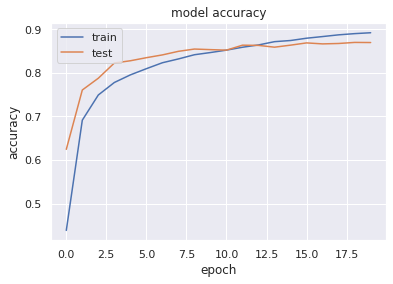

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Loss Curve

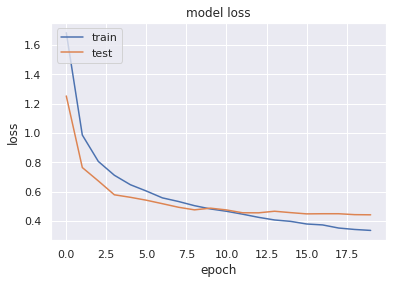

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

#### Observation:  
<ol>
<li><span style="color:#228B22"> For the best model we got 87% accuracy for test set and 92% accuracy for the validation set. 
<li><span style="color:#228B22"> We observe that the model has converged approximately around 10 epochs 
<li><span style="color:#228B22"> Since the curves cross at around 10 epoch the training should stop at the point for best result. Further training will only learn noise or high frequency features which are not good in production. 